<a href="https://colab.research.google.com/github/DavorJordacevic/TensorFlow-Keras-Neural-Networks/blob/master/TensorFlow_Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2020-02-03 21:29:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   167MB/s    in 0.4s    

2020-02-03 21:29:43 (167 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
with zipfile.ZipFile("cats_and_dogs_filtered.zip","r") as zip_ref:
    zip_ref.extractall()

In [0]:
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
train_cat_file_names = os.listdir(train_cats_dir)
train_cat_file_names.sort()
print(train_cat_file_names[:10])

train_dog_file_names = os.listdir(train_dogs_dir)
train_dog_file_names.sort()
print(train_dog_file_names[:10])

validation_cats_file_names = os.listdir(validation_cats_dir)
validation_cats_file_names.sort()
print(validation_cats_file_names[:10])

validation_dogs_file_names = os.listdir(validation_dogs_dir)
validation_dogs_file_names.sort()
print(validation_dogs_file_names[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['cat.2000.jpg', 'cat.2001.jpg', 'cat.2002.jpg', 'cat.2003.jpg', 'cat.2004.jpg', 'cat.2005.jpg', 'cat.2006.jpg', 'cat.2007.jpg', 'cat.2008.jpg', 'cat.2009.jpg']
['dog.2000.jpg', 'dog.2001.jpg', 'dog.2002.jpg', 'dog.2003.jpg', 'dog.2004.jpg', 'dog.2005.jpg', 'dog.2006.jpg', 'dog.2007.jpg', 'dog.2008.jpg', 'dog.2009.jpg']


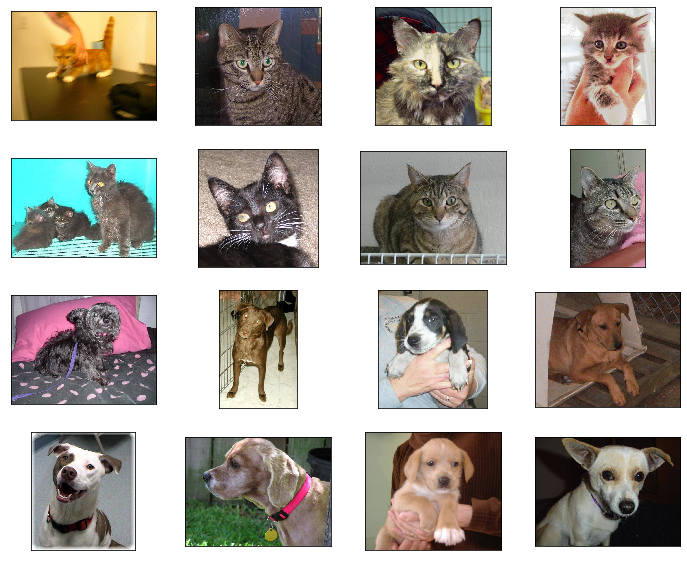

In [0]:
picture_index = 8
next_cat = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_file_names[picture_index-8:picture_index]]
next_dog = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_file_names[picture_index-8:picture_index]]

plt.figure(figsize=(12,10))
for i, img_path in enumerate(next_cat + next_dog):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mpimg.imread(img_path))
plt.show()

In [0]:
class Create_model(Model):
  def __init__(self, chanDim=-1):
    super(Create_model, self).__init__()
    self.conv1A = Conv2D(16, 3, input_shape = (150, 150, 3))
    self.act1A  = Activation("relu")
    self.pool1A = MaxPooling2D(2)
    self.conv1B = Conv2D(32, 3)
    self.act1B  = Activation("relu")
    self.pool1B = MaxPooling2D(pool_size=(2, 2))
    self.conv1C = Conv2D(64, 3)
    self.act1C  = Activation("relu")
    self.pool1C = MaxPooling2D(2)
    
    self.flatten = Flatten()
    self.dense2A = Dense(512)
    self.act2A  = Activation("relu")
    self.dense2B = Dense(1)
    self.sigmoid  = Activation("sigmoid")
  
  def call(self, inputs):
    x = self.conv1A(inputs)
    x = self.act1A(x)
    x = self.pool1A(x)
    x = self.conv1B(x)
    x = self.act1B(x)
    x = self.pool1B(x)
    x = self.conv1C(x)
    x = self.act1C(x)
    x = self.pool1C(x)
    
    x = self.flatten(x)
    x = self.dense2A(x)
    x = self.act2A(x)
    x = self.dense2B(x)
    x = self.sigmoid(x)
    
    return x

In [0]:
model = Create_model()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=0)

  ...
    to  
  ['...']


Text(0.5, 1.0, 'Training and validation loss')

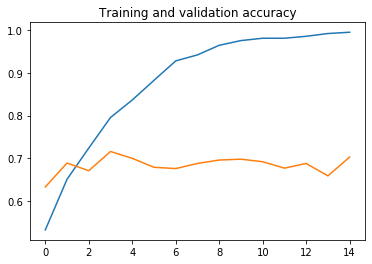

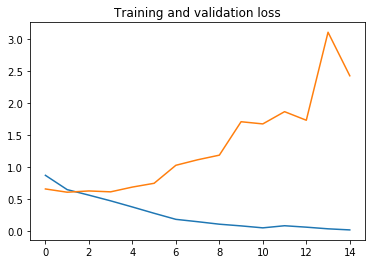

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
############################################

In [0]:
# Data Augmentation

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


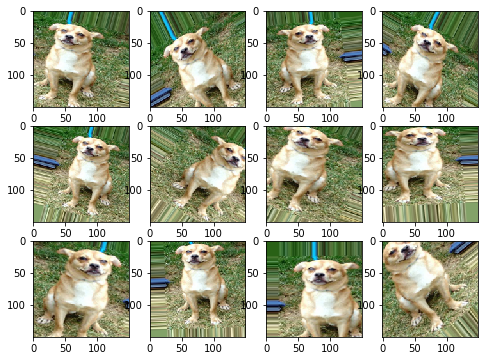

In [0]:
augmented_images = [train_generator[0][0][0] for i in range(12)]
plt.figure(figsize=(8,6))

for i in range(12):
	plt.subplot(3, 4, i+1)
	image = augmented_images[i]
	image = image.reshape(150, 150, 3)
	plt.imshow(image)
pyplot.show()

In [0]:
class Create_model(Model):
  def __init__(self, chanDim=-1):
    super(Create_model, self).__init__()
    self.conv1A = Conv2D(16, 3, input_shape = (150, 150, 3))
    self.act1A  = Activation("relu")
    self.pool1A = MaxPooling2D(2)
    self.conv1B = Conv2D(32, 3)
    self.act1B  = Activation("relu")
    self.pool1B = MaxPooling2D(pool_size=(2, 2))
    self.conv1C = Conv2D(64, 3)
    self.act1C  = Activation("relu")
    self.pool1C = MaxPooling2D(2)
    
    self.flatten = Flatten()
    self.dense2A = Dense(512)
    self.act2A  = Activation("relu")
    self.dropout = Dropout(0.5)
    self.dense2B = Dense(1)
    self.sigmoid  = Activation("sigmoid")
  
  def call(self, inputs):
    x = self.conv1A(inputs)
    x = self.act1A(x)
    x = self.pool1A(x)
    x = self.conv1B(x)
    x = self.act1B(x)
    x = self.pool1B(x)
    x = self.conv1C(x)
    x = self.act1C(x)
    x = self.pool1C(x)
    
    x = self.flatten(x)
    x = self.dense2A(x)
    x = self.act2A(x)
    x = self.dropout(x)
    x = self.dense2B(x)
    x = self.sigmoid(x)
    
    return x

In [0]:
model = Create_model()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 slika = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 slika = batch_size * steps
      verbose=2)

Epoch 1/30
100/100 - 19s - loss: 1.1230 - acc: 0.5000 - val_loss: 0.6671 - val_acc: 0.5720
Epoch 2/30
100/100 - 17s - loss: 0.7145 - acc: 0.5606 - val_loss: 0.6564 - val_acc: 0.5560
Epoch 3/30
100/100 - 17s - loss: 0.6704 - acc: 0.6091 - val_loss: 0.6322 - val_acc: 0.6330
Epoch 4/30
100/100 - 17s - loss: 0.6545 - acc: 0.6335 - val_loss: 0.7002 - val_acc: 0.6290
Epoch 5/30
100/100 - 17s - loss: 0.6485 - acc: 0.6368 - val_loss: 0.6446 - val_acc: 0.6520
Epoch 6/30
100/100 - 17s - loss: 0.6404 - acc: 0.6502 - val_loss: 0.5741 - val_acc: 0.6990
Epoch 7/30
100/100 - 17s - loss: 0.6220 - acc: 0.6729 - val_loss: 0.5986 - val_acc: 0.6890
Epoch 8/30
100/100 - 17s - loss: 0.6128 - acc: 0.6692 - val_loss: 0.5475 - val_acc: 0.7230
Epoch 9/30
100/100 - 17s - loss: 0.6046 - acc: 0.6783 - val_loss: 0.5540 - val_acc: 0.7180
Epoch 10/30
100/100 - 17s - loss: 0.6227 - acc: 0.6721 - val_loss: 0.5728 - val_acc: 0.7180
Epoch 11/30
100/100 - 17s - loss: 0.6003 - acc: 0.7018 - val_loss: 0.5802 - val_acc: 0.68

Text(0.5, 1.0, 'Training and validation loss')

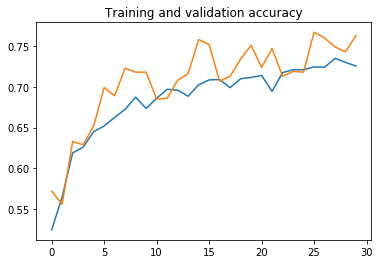

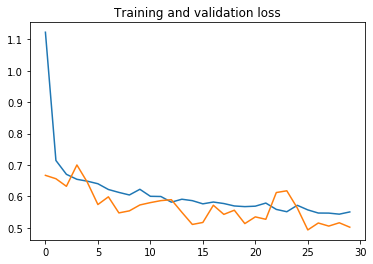

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')



---



In [0]:
###################################################

In [0]:
### Transfer Learning ###

In [0]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

In [0]:
base_model = MobileNetV2(input_shape=(224, 224, 3),
                                      include_top=False,
                                      weights='imagenet')

9412608/9406464 [==============================] - 1s 0us/step


In [0]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
base_model.trainable = False

In [0]:
model = Sequential([base_model,
                    GlobalAveragePooling2D(),
                    Dense(1, activation='sigmoid')])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Text(0.5, 1.0, 'Training and validation loss')

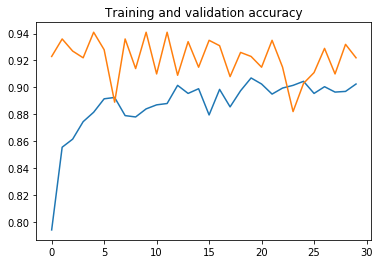

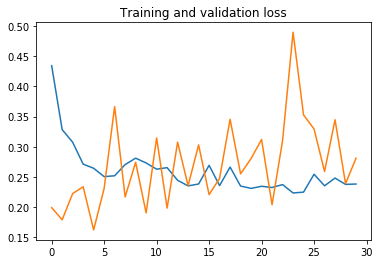

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
###############################################################

In [0]:
### Transfer Learnign with TensorFlow Hub ###

In [0]:
import tensorflow_hub as hub

In [0]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"

In [0]:
feature_extractor = hub.KerasLayer(URL, input_shape=(224, 224, 3))

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
image_batch, label_batch = next(iter(train_generator))

In [0]:
feature_batch = feature_extractor(image_batch)
print(feature_batch.shape)

(32, 1280)


In [0]:
feature_extractor.trainable = False

In [0]:
model = Sequential([
  feature_extractor,
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(
      train_generator,
      epochs=6,
      validation_data=validation_generator,
      verbose=2)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 63 steps, validate for 32 steps
Epoch 1/6
63/63 - 20s - loss: 0.2583 - accuracy: 0.8930 - val_loss: 0.0940 - val_accuracy: 0.9810
Epoch 2/6
63/63 - 10s - loss: 0.0771 - accuracy: 0.9770 - val_loss: 0.0672 - val_accuracy: 0.9810
Epoch 3/6
63/63 - 10s - loss: 0.0567 - accuracy: 0.9845 - val_loss: 0.0583 - val_accuracy: 0.9820
Epoch 4/6
63/63 - 10s - loss: 0.0459 - accuracy: 0.9880 - val_loss: 0.0507 - val_accuracy: 0.9840
Epoch 5/6
63/63 - 10s - loss: 0.0402 - accuracy: 0.9900 - val_loss: 0.0475 - val_accuracy: 0.9850
Epoch 6/6
63/63 - 10s - loss: 0.0336 - accuracy: 0.9930 - val_loss: 0.0458 - val_accuracy: 0.9850


Text(0.5, 1.0, 'Training and validation loss')

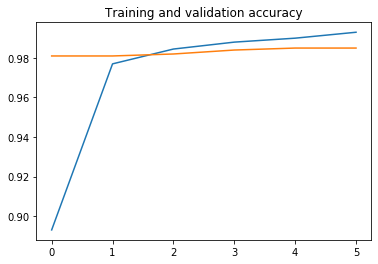

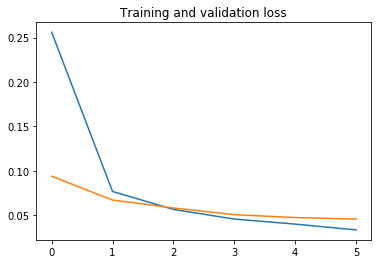

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
image_batch, label_batch = next(iter(validation_generator))

In [0]:
predicted_batch = model.predict_classes(image_batch)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


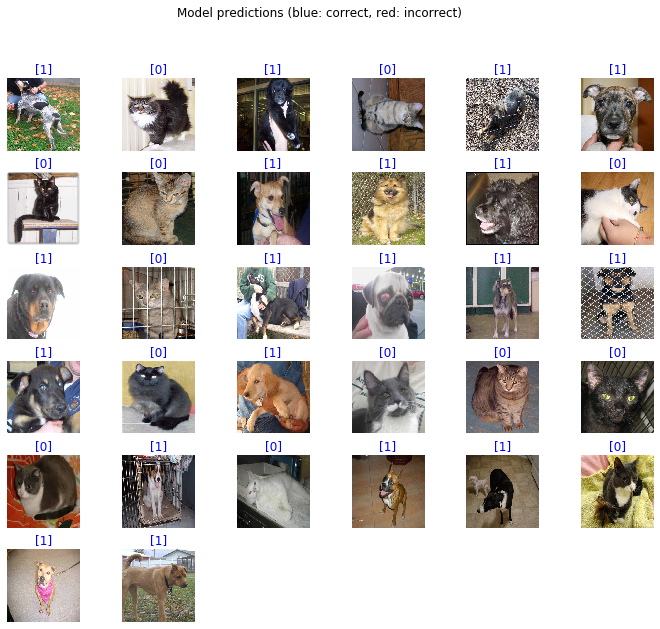

In [0]:
plt.figure(figsize=(12,10))
for n in range(32):
  plt.subplot(6,6,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_batch[n] == label_batch[n] else "red"
  plt.title(predicted_batch[n], color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")